In [1]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import pandas as pd


In [2]:
traindata = pd.read_csv("C:/Users/nurul/Desktop/Datasets/traindata_red_13vars.csv")
testdata = pd.read_csv("C:/Users/nurul/Desktop/Datasets/testdata_red_13vars.csv")

# Extract features (X) and labels (y) for the train data
X_train = traindata.drop('RED_CVD_outcome', axis=1) 
y_train = traindata['RED_CVD_outcome']

# Extract features (X) and labels (y) for the test data
X_test = testdata.drop('RED_CVD_outcome', axis=1)  
y_test = testdata['RED_CVD_outcome']

In [3]:
from sklearn.preprocessing import LabelEncoder


In [5]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical labels (traindata)
y_train_encoded = label_encoder.fit_transform(y_train)

# Invert the encoding
y_train_encoded = 1 - y_train_encoded

# Mapping of original labels to encoded labels
label_mapping = {'HaveEvent': 1, 'NoEvent': 0}

# Print the mapping
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'HaveEvent': 1, 'NoEvent': 0}


In [6]:
# Initialize SVM classifier with linear kernel
svm_model = svm.SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train_encoded)

svm_model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

In [7]:
# Create a SHAP explainer object
explainer = shap.Explainer(svm_model, X_train)

In [8]:
# Calculate SHAP values
shap_values = explainer(X_test)

shap_values

.values =
array([[ 0.66796185, -0.14207119, -0.16337178, ..., -0.29461561,
        -0.38396277,  0.30344603],
       [-0.64176727,  0.21310678,  0.12343891, ...,  0.17381996,
         0.29588247, -0.0621516 ],
       [ 0.66796185, -0.14207119, -0.16337178, ..., -0.4897971 ,
        -0.0698907 ,  0.30344603],
       ...,
       [-0.64176727, -0.14207119, -0.00893526, ...,  0.30827831,
         0.06153638, -0.0621516 ],
       [-0.64176727, -0.14207119,  0.12343891, ...,  0.21574783,
         0.03544424, -0.0621516 ],
       [-0.64176727,  0.21310678,  0.05725183, ...,  0.20128994,
         0.23355124, -0.0621516 ]])

.base_values =
array([-0.14212155, -0.14212155, -0.14212155, ..., -0.14212155,
       -0.14212155, -0.14212155])

.data =
array([[ 1.        ,  2.        ,  0.90952027, ...,  0.9968861 ,
         2.06199797,  1.        ],
       [ 0.        ,  1.        , -0.60609952, ..., -0.56419182,
        -1.62300824,  0.        ],
       [ 1.        ,  2.        ,  0.90952027, ...,  1

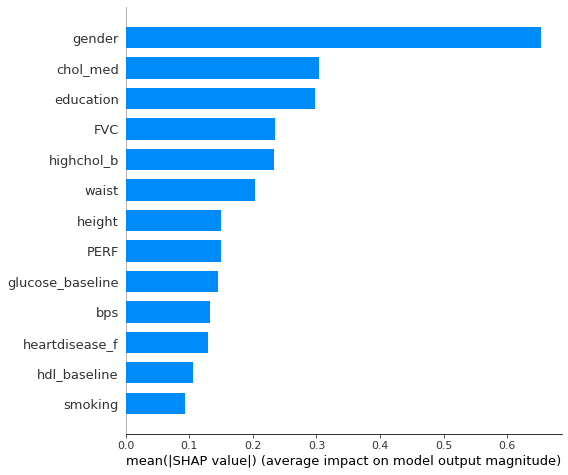

In [9]:
# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

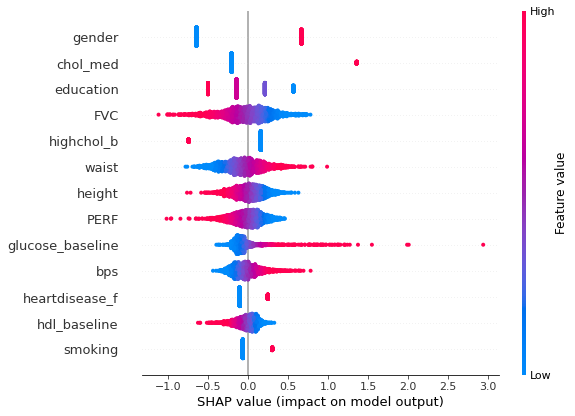

In [10]:
# Plot the SHAP beeswarm plot
shap.plots.beeswarm(shap_values, max_display=13)


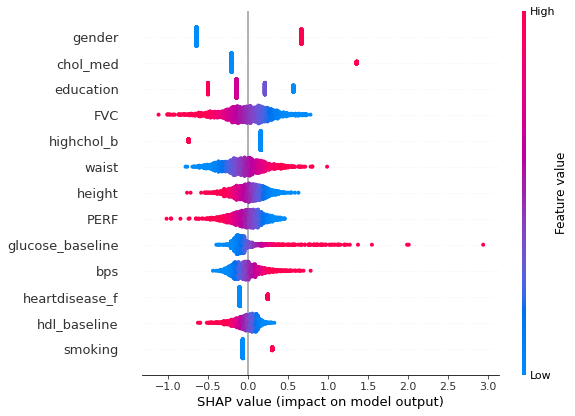

In [21]:
shap.plots.beeswarm(shap_values, max_display=13)